#Assignment 1:
    test if the distribution of ages is the same for 
    
    1) male and femal riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's

my usual imports and setups

In [11]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. If you are ambitios you can use data from multiple months, thus addressing systematic errors as well

In [12]:
df=pd.read_csv('201501-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


#BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [13]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

lets splot age in 10 year bins. 

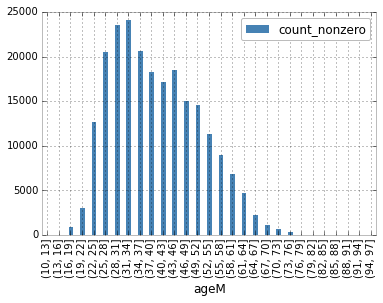

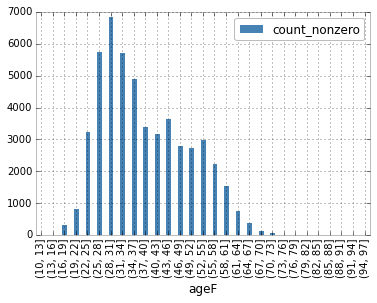

In [14]:
#The solution use 3 years as interval
bins = np.arange(10, 99, 3)
#bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 13]            NaN
(13, 16]            NaN
(16, 19]       0.001594
(19, 22]       0.004066
(22, 25]       0.010955
(25, 28]       0.031496
(28, 31]       0.059622
(31, 34]       0.063521
(34, 37]       0.067195
(37, 40]       0.052146
(40, 43]       0.038256
(43, 46]       0.027124
(46, 49]       0.014707
(49, 52]       0.003454
(52, 55]       0.011015
(55, 58]       0.014578
(58, 61]       0.014215
(61, 64]       0.008276
(64, 67]       0.005659
(67, 70]       0.003203
(70, 73]       0.002022
(73, 76]       0.000595
(76, 79]       0.000180
(79, 82]       0.000003
(82, 85]       0.000002
(85, 88]            NaN
(88, 91]            NaN
(91, 94]            NaN
(94, 97]            NaN
 
0.0671946856411


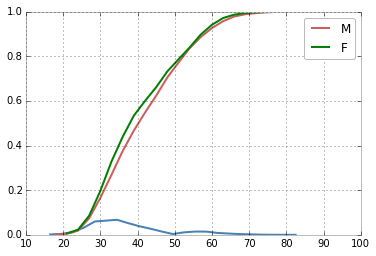

In [15]:
#print df.ageS, df.ageS.cumsum()
#I can change the bin to thiner value to make the visualization better, such as by one year
#bins = np.arange(10, 99, 1)

#pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False)
#Return indices of half-open bins to which each value of x belongs.

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

myks = np.abs(csM / csM.max()-csF / csF.max())
print myks
pl.plot(bins[:-1]+0.5, myks )
#np.nanmax: Return the maximum of an array or maximum along an axis, ignoring any NaNs.
myks=nanmax(myks)
print " "
print myks

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

they look pretty darn similar! that sets my expectation for the tests to come. if i wanted to code the KS test by hand i woud have everything i need: the normalized cumulative distributions can be subtracted from each other and the max distance can be seeked. 

Notice that there amay be Nan values you are gonna have to deal with! you can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [16]:
import scipy.stats

#KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.

If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.


In [17]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)

print ks


(0.61519793242561782, 0.0)


remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1+n2)}{n1n2}}$

where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

but scipy is already giving you the p-value, s you do not have to worry about it i am still giving you the table FWI and if you want to do the coding of the KS test by hand


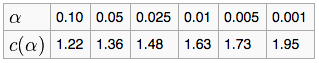

In [53]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
Image(filename="ks2sample_table.png")

##this cell is for you to tell me what the scipy KS test returned and what it means

The scipy KS test for two samples returns the KS statistic $D_KS(n1,n2)$ and p-value.

Since our p-value is very small in this case (0.0), and also the KS statistic $D_KS(n1,n2)$ > $c(\alpha)$ (see below)

we can reject the null hypothesis. since the pvalue is below 1%, which means the two samples are not drawn from the same distribution.

In [21]:
#The scipy.stats.ks_2samp somewhat already consider the size of the dataset so c(a) here actually is the d*sqrt(n)
#we do not have to calculate that again, simply use the critical value from the above table

c=1.36 #when alpha=0.05

print ks[0], c

if ks[0]>c:
    print "The Null hypothesis is rejected"
else:
    print "The Null hypothesis is not rejected"

0.615197932426 1.36
The Null hypothesis is not rejected


###NOT REJECTED: 0.61<1.36
###the KS statistics says the NULL that age distribution comes from the same parent distribution cannot be rejected
----------------------------

#Pearson's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr

The Pearson correlation coefficient measures the linear relationship between two datasets.

Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. 

Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. 

52093
52093
Pearson's r (0.99752913977246038, 0.0)


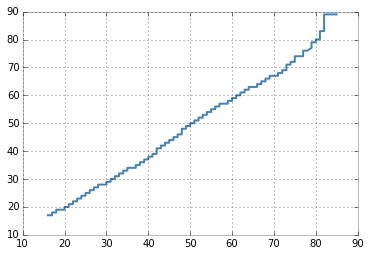

In [25]:
#please perform the Pearson's test and tell me what you find

##NOTE: the test is pairwise, so i have to sort the ages! 
## we are trying to see if 2 vasiables change in a similar way, so it is intuitive 
## that they should be sorted by the natural scale, in this case age

# the samples need to be cleaned off nan values and the male sample has unlikely values >90 years which i am remoging
ageMsorted = df.ageM[(~np.isnan(df.ageM)) & ((df.ageM)<90)]
#print ageMsorted[-30:], len(ageMsorted), np.isnan(ageMsorted)

ageFsorted = sorted(df.ageF[~np.isnan(df.ageF)])
print len(ageFsorted)

#the length of the two datasets is different. use np.random.choice to select the same length
ageMsorted = sorted(np.random.choice( ageMsorted, len(ageFsorted), replace=False))
pl.plot(ageMsorted, ageFsorted)
print len(ageMsorted)
r_P = scipy.stats.pearsonr(ageMsorted, ageFsorted)
print  "Pearson's r" , r_P

###scipy.stats,pearsonr returns Pearson’s correlation coefficient and 2-tailed p-value
The Pearsons's correlation coefficient in our test is close to 1 which indicates the two samples are strongly correlated 


#Spearman's  test for correlation

The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation.

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [26]:
#please perform the Spearman's test and tell me what you find
r_S = scipy.stats.spearmanr(ageMsorted, ageFsorted)
print  r_S

(0.99915609293944074, 0.0)


####Scipy.stats.spearmanr returns spearmanr correlation and p-value. 
Spearman's correlation coefficient is close to 1 which indicates the two samples are strongly correlated 

##please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??
The samples haare strongly correlated. the lager number of the Pearson's test indicates that. However the correlation cannot be quantified numerically with the Pearson's test.

The spearman's correlation test instead returns a p-value, which under some assumptions (and in the case of a large sample, which is the case for us) indicates a negligeble probability (p = 0) that the samples are not related

##DO THE SAME FOR THE DISTRIBUTION OF RIDERS DURING THE DAY VS DURING THE NIGHT!

hint: remember how I converted the starttime last time in my own citibikes notebook into units that are easy to read. 
df['mystarttime'] = ...
then you can use something like
df['mystarttime'].dt.hour

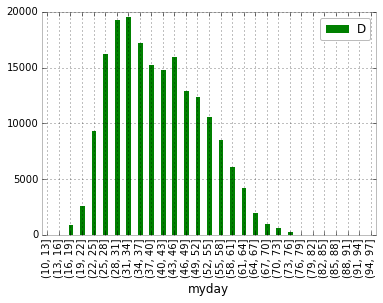

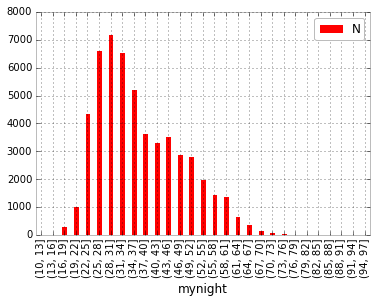

In [30]:
df['mystarttime'] = pd.to_datetime(df['starttime'])

#Let's assume the day time is from 7AM-5PM
#use the subscriber data & plot them for different ages
df['myday']=2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['mystarttime'].dt.hour > 6) & (df['mystarttime'].dt.hour < 18)]
df['mynight']=2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['mystarttime'].dt.hour > 18) | (df['mystarttime'].dt.hour < 6)]                                 

#my original setting
#df['myday']=2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['mystarttime'].dt.hour >= 7) & (df['mystarttime'].dt.hour <= 17)]
#df['mynight']=2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['mystarttime'].dt.hour >= 18) | (df['mystarttime'].dt.hour <= 6)]                                 


bins = np.arange(10, 99, 3)
df.myday.groupby(pd.cut(df.myday, bins)).agg([count_nonzero]).plot(kind='bar', label='Day riders',color='green')
pl.legend('Day riders')
df.mynight.groupby(pd.cut(df.mynight, bins)).agg([count_nonzero]).plot(kind='bar', label='Night riders',color='red')
pl.legend('Night riders')
 

0.134290616664


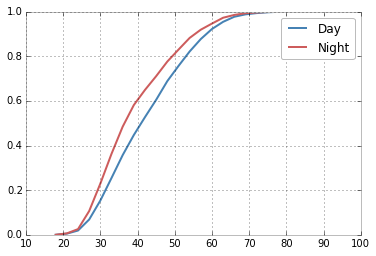

In [31]:
#print df.ageS, df.ageS.cumsum()

csD=df.myday.groupby(pd.cut(df.myday, bins)).agg([count_nonzero]).cumsum()

csN=df.mynight.groupby(pd.cut(df.mynight, bins)).agg([count_nonzero]).cumsum()

myks = np.abs(csD / csD.max() - csN / csN.max())
myks = nanmax(myks) 
print myks
#pl.plot(bins[:-1]+0.5, myks )

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.legend()

In [32]:
ks=scipy.stats.ks_2samp(df.myday, df.mynight)

print 'KS test result is:'
print ks

KS test result is:
(0.4813028800358603, 0.0)


In [34]:
print ks[0],c

if ks[0]>c:
    print "The Null hypothesis is rejected, the two distributions are not the same"
else:
    print "The Null hypothesis is not rejected"

0.481302880036 1.36
The Null hypothesis is not rejected


###the KS statistics again says the NULL that age distribution comes from the same parent distribution cannot be rejected (although the statistics is weaker the p value is still 0)

In [36]:
# the samples need to be cleaned off nan values and the male sample has unlikely values >90 years which i am remoging
ageDsorted = df.myday[(~np.isnan(df.myday)) & ((df.myday)<90)]
ageNsorted = sorted(df.mynight[(~np.isnan(df.mynight)) & ((df.mynight)<90)])
#print ageMsorted[-30:], len(ageMsorted), np.isnan(ageMsorted)

print len(ageNsorted)
print len(ageDsorted)

54102
191450


54102
Pearson's r (0.99401289348595723, 0.0)
(0.99915010579337893, 0.0)


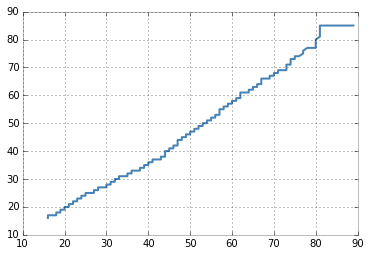

In [37]:
ageDsorted = sorted(np.random.choice( ageDsorted, len(ageNsorted), replace=False))
pl.plot(ageDsorted, ageNsorted)
print len(ageDsorted)
r_P = scipy.stats.pearsonr(ageDsorted, ageNsorted)
print "Pearson's r" , r_P

r_S = scipy.stats.spearmanr(ageNsorted, ageDsorted)
print  r_S

In [39]:
print r_S[0], 'is close to 1, the two samples are correlated'

0.999150105793 is close to 1, the two samples are correlated


###Again Pearson's R and Spearman's test say tha the distribution of ages of night and day riders is not significantly different